# Model `BinaryMFThreshold` with sigmoid link function

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')

[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 4
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


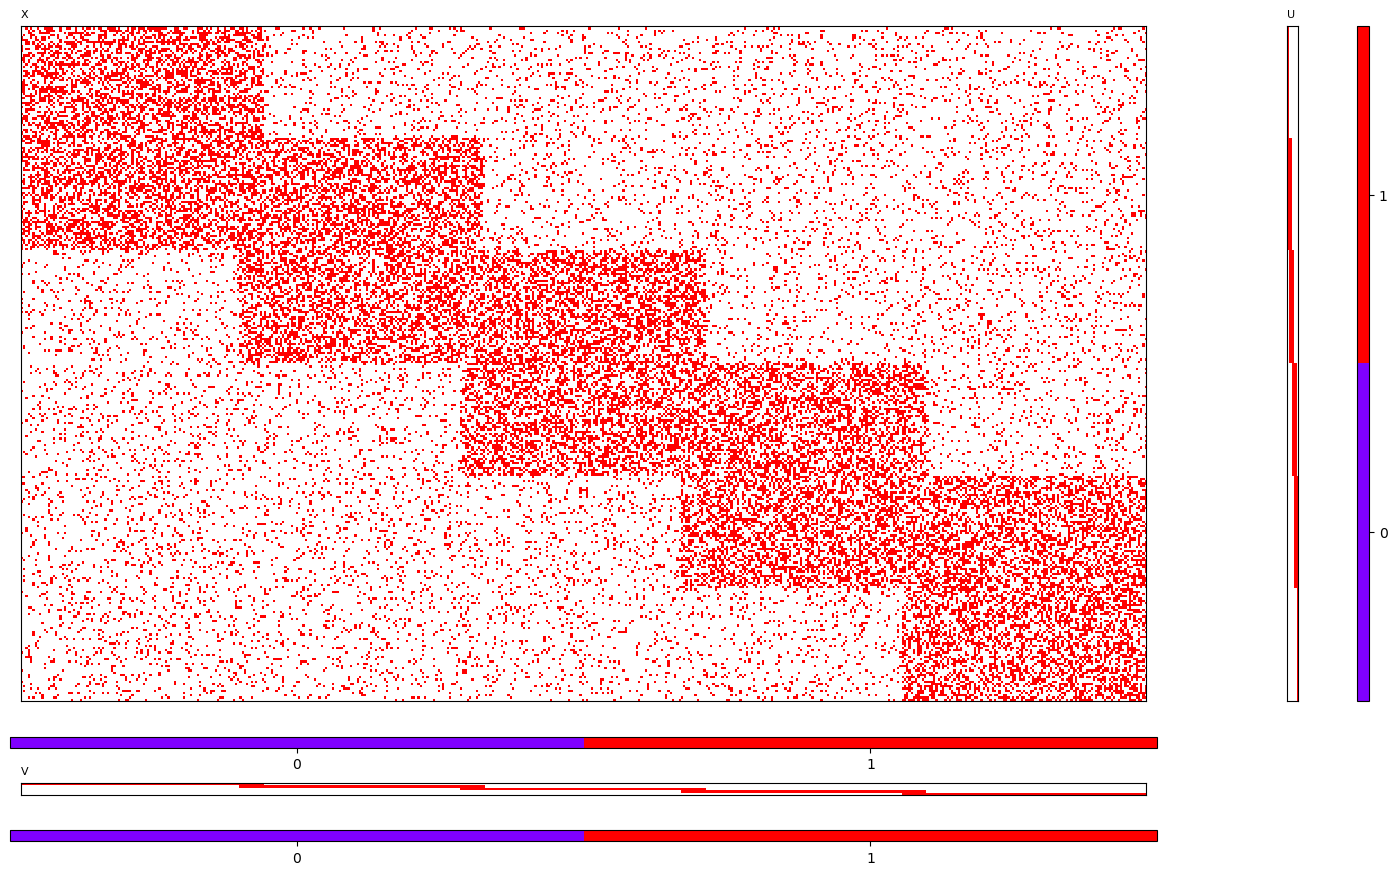

<Figure size 640x480 with 0 Axes>

In [2]:
from generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.5, 0.1, 0.5, 0.1])
data.generate(seed=1000)

data.add_noise(noise=[0.6, 0.1], seed=2000)
data.show_matrix()

In [3]:
# from datasets import MovieLensData

# data = MovieLensData(size="100k")
# data.load()

# idx = data.sample(factor_id=0, n_samples=300, seed=1000)
# idx = data.sample(factor_id=1, n_samples=500, seed=1000)

In [4]:
from datasets import RatioSplit

split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split.negative_sample(
    train_size=split.pos_train_size, 
    val_size=split.pos_val_size, 
    test_size=split.pos_test_size, 
    seed=2023, type='popularity')

[I] RatioSplit, sampling positives
[I]   seed         : 1997
[I]   train_size   : 23727
[I]   val_size     : 3390
[I]   test_size    : 6780
[I]   seed         : 1997
[I] RatioSplit, sampling negatives
[I]   seed         : 2023
[I]   all_negatives: 116103
[I]   n_negatives  : 33897
[I]   train_size   : 23727
[I]   val_size     : 3390
[I]   test_size    : 6780
[I]   seed         : 2023


# Init with `NMFSklearn`

The thresholding gap can be relatively wide if you init with `NMFSklearn` followed by `BinaryMFPenalty`, as the factors are already (near) binary.

[I] k            : 5
[I] U            : None
[I] V            : None
[I] beta_loss    : frobenius
[I] init_method  : nndsvd
[I] solver       : cd
[I] tol          : 0.0001
[I] max_iter     : 1000
[I] seed         : 2024
[I] verbose      : False
[I] display      : False
[I] Missing validation data.
[W] Missing testing data.
[I] U, V existed. Skipping initialization.


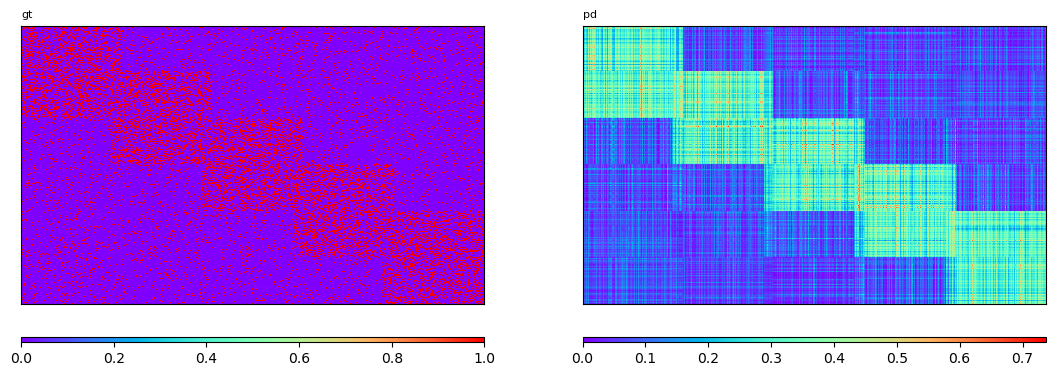

[I] model saved as: 24-06-19_00-26-41_NMFSklearn.pickle


<Figure size 640x480 with 0 Axes>

In [5]:
X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

k = 5
reg = 1
reg_growth = 3

from models import NMFSklearn, BinaryMFPenalty

model_nmf = NMFSklearn(k=k, init_method='nndsvd', max_iter=1000, seed=2024)
model_nmf.fit(X_train=X_train)

U, V = model_nmf.U, model_nmf.V

In [6]:
# model_bmf = BinaryMFPenalty(k=k, U=U, V=V, reg=reg, reg_growth=reg_growth, init_method='custom', max_iter=100, seed=2024)
# model_bmf.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='prediction', verbose=False, display=False)

# U, V = model_bmf.U, model_bmf.V

# Reconstruction task

[I] k            : 5
[I] U            : (300, 5)
[I] V            : (500, 5)
[I] W            : mask
[I] u            : 0.1
[I] v            : 0.1
[I] link_lamda   : 10
[I] lamda        : 100
[I] min_diff     : 0.001
[I] max_iter     : 30
[I] solver       : line-search
[I] init_method  : custom
[I] seed         : 1718728001
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Normalized U: [0.0, 1.0809496202260003] -> [0.0, 1.0], V: [0.0, 0.8387907670476501] -> [0.0, 1.0]
[I] iter: 1, start: [0.100, 0.100], direction: [1882.623, 2713.708]
[I] iter: 2, start: [0.330, 0.431], direction: [-40.128, -471.580]
[I] iter: 3, start: [0.320, 0.316], direction: [-54.902, 42.674]
[I] iter: 4, start: [0.266, 0.358], direction: [-27.817, -115.799]
[I] iter: 5, start: [0.260, 0.330], direction: [-40.660, 41.587]
[I] iter: 6, start: [0.240, 0.350], direction: [11.846, -12.653]
[I] iter: 7, start: [0.251, 0.337], direction: [-98.475, 5.492]
[I] iter: 8, start: [0.221,

train  \
                                                                    0   
                 time iter         u         v            F    Recall   
0   19/06/24 12:26:42    0  0.100000  0.100000  9490.203861  0.939605   
1   19/06/24 12:26:42    1  0.329812  0.431263  6602.410052  0.656383   
2   19/06/24 12:26:42    2  0.320015  0.316131  6482.601513  0.706410   
3   19/06/24 12:26:42    3  0.266400  0.357806  6479.366938  0.691912   
4   19/06/24 12:26:43    4  0.259609  0.329534  6471.947266  0.705778   
5   19/06/24 12:26:43    5  0.239755  0.349841  6466.542811  0.699751   
6   19/06/24 12:26:43    6  0.251324  0.337484  6462.988776  0.702407   
7   19/06/24 12:26:44    7  0.221271  0.339160  6459.032315  0.707843   
8   19/06/24 12:26:44    8  0.229507  0.339261  6457.168039  0.705357   
9   19/06/24 12:26:44    9  0.224589  0.339097  6455.624665  0.706621   
10  19/06/24 12:26:45   10  0.226156  0.339136  6455.308332  0.705357   
11  19/06/24 12:26:45   11  0.225838  0.339140  6455.294143  0.706073   

                                       val                                \
                                         0                                 
   Precision  Accuracy        F1    Recall Precision  Accuracy        F1   
0   0.189673  0.355480  0.315632  0.903835  0.026068  0.234660  0.050674   
1   0.328718  0.733620  0.438056  0.641003  0.045865  0.690520  0.085605   
2   0.317059  0.712873  0.437675  0.700590  0.044927  0.656640  0.084438   
3   0.321543  0.720333  0.439051  0.689381  0.045772  0.668180  0.085845   
4   0.317815  0.713827  0.438274  0.703245  0.045245  0.657913  0.085020   
5   0.319645  0.716913  0.438832  0.699705  0.045666  0.662747  0.085737   
6   0.318704  0.715413  0.438464  0.699115  0.045322  0.660380  0.085125   
7   0.316117  0.711560  0.437051  0.704425  0.044947  0.655047  0.084503   
8   0.317523  0.713580  0.437915  0.702950  0.045211  0.657787  0.084958   
9   0.316812  0.712560  0.437480  0.703835  0.045086  0.656407  0.084744   
10  0.317523  0.713580  0.437915  0.702950  0.045211  0.657787  0.084958   
11  0.317196  0.713087  0.437741  0.703540  0.045157  0.657093  0.084866   

        test                                
           0                                
      Recall Precision  Accuracy        F1  
0   0.899115  0.051864  0.252487  0.098070  
1   0.629794  0.090126  0.695880  0.157687  
2   0.695133  0.089153  0.665213  0.158038  
3   0.679351  0.090213  0.675833  0.159275  
4   0.694248  0.089332  0.666287  0.158296  
5   0.687758  0.089773  0.670693  0.158816  
6   0.690118  0.089477  0.668567  0.158414  
7   0.694690  0.088652  0.663407  0.157238  
8   0.693068  0.089152  0.666067  0.157981  
9   0.693658  0.088868  0.664700  0.157552  
10  0.693068  0.089152  0.666067  0.157981  
11  0.693510  0.089026  0.665387  0.157796

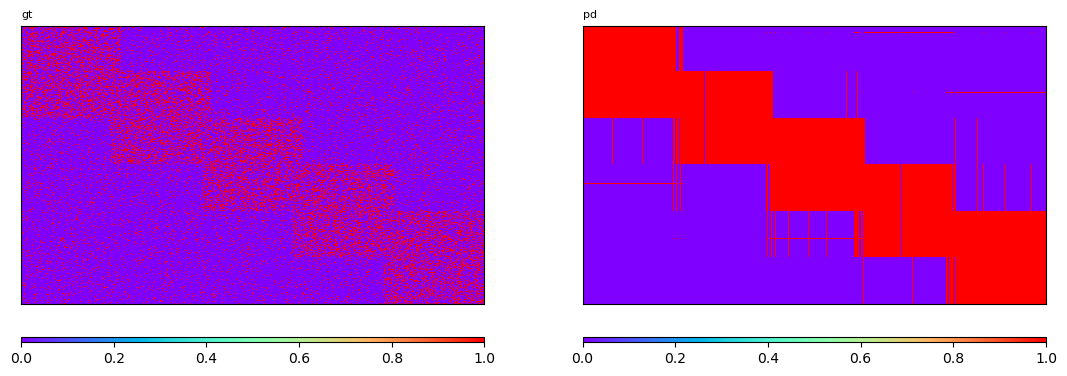

[I] model saved as: 24-06-19_00-26-45_BinaryMFThresholdExSigmoid.pickle


<Figure size 640x480 with 0 Axes>

In [7]:
from models import BinaryMFThresholdExSigmoid

k = 5
u, v = 0.1, 0.1
# W = 'full'
W = 'mask'
init_method = 'custom'

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

model = BinaryMFThresholdExSigmoid(k=k, U=U, V=V, W=W, u=u, v=v, init_method=init_method)
model.fit(X_train=X_train, X_val=X_val, X_test=X_test, task='reconstruction', verbose=False, display=False)

# Visualize F

In [8]:
# from mpl_toolkits import mplot3d
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
# from tqdm import tqdm

# N = 50
# dpi = 100

In [9]:
# x = np.linspace(0, 1.2, N)
# y = np.linspace(0, 1.2, N)
# Z = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         Z[i, j] = model.F([X[i, j], Y[i, j]])
        
# # fig = plt.figure(dpi=dpi)
# # ax = plt.axes(projection='3d')
# # ax.contour3D(X, Y, Z, 50, cmap='hot')
# # ax.set_xlabel('x')
# # ax.set_ylabel('y')
# # ax.set_zlabel('z')

# levels = np.logspace(0, 10, num=50, endpoint=True, base=10)
# levels = (levels - levels.min()) / (levels.max() - levels.min())
# levels = levels * (Z.max() - Z.min()) + Z.min()

# plt.figure(dpi=dpi)
# cp = plt.contour(X, Y, Z, levels=levels)
# plt.clabel(cp, inline=1, fontsize=10)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()

# Visualize dF

In [10]:
# x = np.linspace(0.0, 1.2, N)
# y = np.linspace(0.0, 1.2, N)
# dx = np.zeros([N, N])
# dy = np.zeros([N, N])
# X, Y = np.meshgrid(x, y)
# for i in tqdm(range(N)):
#     for j in range(N):
#         dx[i, j], dy[i, j] = model.dF([X[i, j], Y[i, j]])

#         # re-scale
#         k = 6 / np.sqrt(dx[i, j]**2 + dy[i, j]**2)
#         dx[i, j] *= k
#         dy[i, j] *= k

# plt.figure(dpi=dpi) 
# fig = plt.quiver(X, Y, dx, dy)
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.show()